In [3]:
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import pandas as pd
import numpy as np
import random
import os

In [4]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d imrandude/olivetti

  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 61.1MB/s]


In [6]:
!mkdir olivetti
!unzip olivetti.zip -d olivetti

Archive:  olivetti.zip
  inflating: olivetti/olivetti_faces.npy  
  inflating: olivetti/olivetti_faces_target.npy  


In [7]:
data = np.load('./olivetti/olivetti_faces.npy')
target = np.load('./olivetti/olivetti_faces_target.npy')

In [8]:
print(data.shape)
print(target)

(400, 64, 64)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 

In [9]:
def show_faces(images):
  fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
  axarr = axarr.flatten()

  for i in range(40):
    image_index = i*10
    axarr[i].imshow(images[image_index], cmap='gray')
    axarr[i].set_title(f"face id: {i}")
  plt.suptitle("There are 40 different images of people")

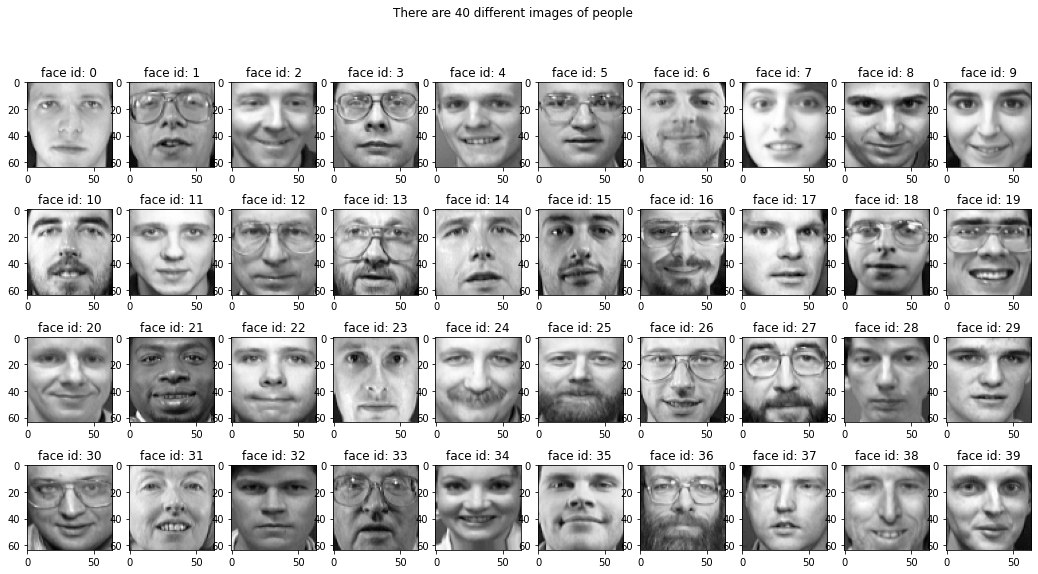

In [10]:
show_faces(data)

In [11]:
def show_specified_faces(images, ids):
  cols = 10
  rows = len(ids)

  fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 9))
  for i , id in enumerate(ids):
    for k in range(cols):
      image_index = id * 10 + k
      axarr[i, k].imshow(images[image_index], cmap='gray')
      axarr[i, k].set_title(f"face id: {k}")

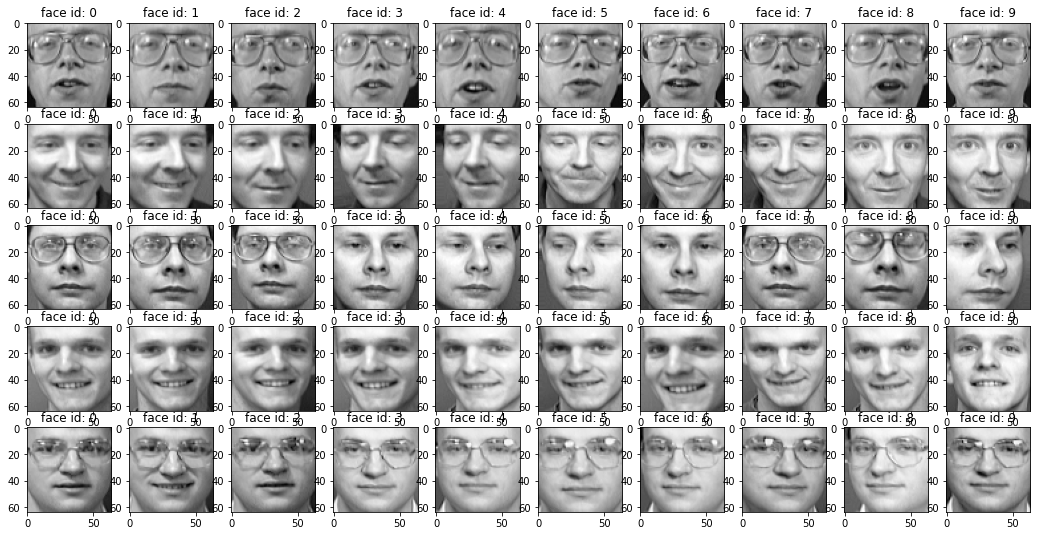

In [12]:
show_specified_faces(data, [1, 2, 3, 4, 5])

In [13]:
def pre_process_img(path, img_shape):
  print('path', path)
  img = Image.open(path)
  img = img.resize((64, 64))
  img = rgb2gray(np.array(img))
  print(img.shape)
  return img 

In [20]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

def load_data(n_faces, batch_size):
  n, w, h = data.shape
  face_select = np.random.choice(n_faces)
  pairs = [np.zeros((batch_size, w, h, 1)) for i in range(2)]
  targets = np.zeros((batch_size, ))

  targets[batch_size//2:] = 1

  for i in range(batch_size):
      pairs[0][i, :, :, :] = data[face_select*10 + i].reshape(w, h, 1)

      if i >= batch_size//2:
        new_face = np.random.choice(np.arange(face_select*10, face_select*10 + batch_size))
        pairs[1][i] = data[new_face].reshape(w, h, 1)
        # print('left and right', face_select*10 +i, new_face)
      else:
        new_face = ((face_select  + np.random.randint(1, n_faces)) % n_faces)*10
        # print('left and right', face_select*10+i, new_face*10)
        pairs[1][i] = data[new_face].reshape(w, h, 1)
  return pairs, targets

In [22]:
load_data(40, 8)

([array([[[[0.28925619],
           [0.23966943],
           [0.22727273],
           ...,
           [0.43801653],
           [0.33471075],
           [0.2107438 ]],
  
          [[0.27685949],
           [0.20247933],
           [0.35123968],
           ...,
           [0.45454547],
           [0.37190083],
           [0.23140496]],
  
          [[0.23966943],
           [0.2107438 ],
           [0.5       ],
           ...,
           [0.46280992],
           [0.39256197],
           [0.25206611]],
  
          ...,
  
          [[0.19008264],
           [0.19421488],
           [0.19008264],
           ...,
           [0.10743801],
           [0.11157025],
           [0.11157025]],
  
          [[0.19421488],
           [0.18595041],
           [0.19834711],
           ...,
           [0.09917355],
           [0.10743801],
           [0.11157025]],
  
          [[0.19834711],
           [0.18595041],
           [0.20661157],
           ...,
           [0.09504132],
           [0.10

In [23]:
def generate_data(batch_size):
  while(True):
    pairs, target = load_data(40, batch_size)
    yield(pairs, target)

In [24]:
a = generate_data(10)
X_train, y = next(a)

In [25]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Lambda
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential, Model
from tensorflow import abs

def get_siamese_model(input_shape):
  left_input = Input(input_shape)
  right_input = Input(input_shape)

  model = Sequential()
  model.add(Conv2D(64, (6, 6), activation='relu', input_shape=input_shape))

  model.add(MaxPooling2D())
  model.add(Conv2D(128, (4, 4), activation='relu'))

  model.add(MaxPooling2D())
  model.add(Conv2D(128, (2, 2), activation='relu'))

  model.add(MaxPooling2D())
  model.add(Conv2D(256, (2, 2), activation='relu'))

  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))

  model_left = model(left_input)
  model_right = model(right_input)

  output_layer = Lambda(lambda x: abs(x[0] - x[1]))
  distance = output_layer([model_left, model_right])

  prediction = Dense(1, activation='sigmoid')(distance)

  siamese_net = Model(inputs=[left_input, right_input], outputs=prediction)
  
  return siamese_net


In [26]:
callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8*10**(epoch/20))
test_model = get_siamese_model((64, 64, 1))
test_model.compile(loss='binary_crossentropy', optimizer=(tf.optimizers.Adam(learning_rate=1e-8)))
test_model.fit(generate_data(10), epochs=100, callbacks=[callback], steps_per_epoch=10)

Epoch 1/100
10/10 [==============================] - 0s 18ms/step - loss: 0.6925
Epoch 2/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6926
Epoch 3/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6922
Epoch 4/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6927
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6924
Epoch 6/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6924
Epoch 7/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6926
Epoch 8/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6923
Epoch 9/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6925
Epoch 10/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6921
Epoch 11/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6923
Epoch 12/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6924
Epoch 13/100
10/10 [=====

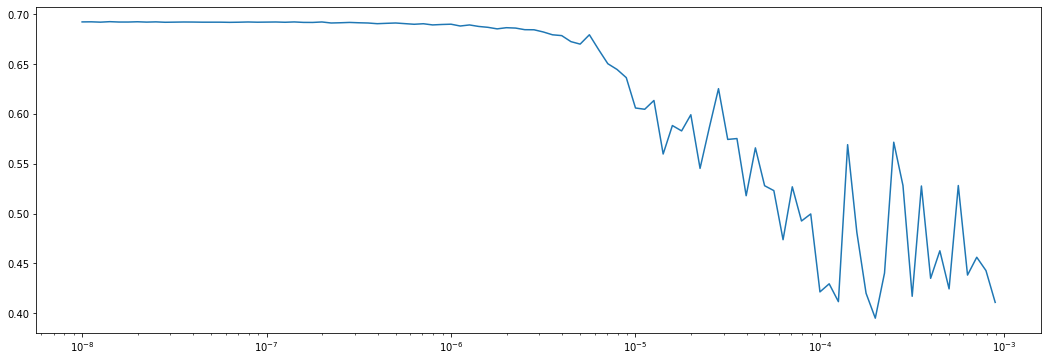

In [27]:
lrs = 1e-8*(10**(np.arange(100) / 20))
plt.figure(figsize=(18, 6))
plt.semilogx(lrs, test_model.history.history['loss'])

In [28]:
model = get_siamese_model((64, 64, 1))
optimizer = tf.optimizers.Adam(lr=4*1e-4) 
model.compile(loss='binary_crossentropy', optimizer=optimizer)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 4096)         26549056    input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4096)         0           sequential_1[0][0]    

In [29]:
model.fit(generate_data(10), epochs=200, steps_per_epoch=10, validation_data=generate_data(10), validation_steps=10)

Epoch 1/200
10/10 [==============================] - 0s 35ms/step - loss: 0.6807 - val_loss: 0.6221
Epoch 2/200
10/10 [==============================] - 0s 20ms/step - loss: 0.6112 - val_loss: 0.5758
Epoch 3/200
10/10 [==============================] - 0s 20ms/step - loss: 0.5916 - val_loss: 0.5538
Epoch 4/200
10/10 [==============================] - 0s 21ms/step - loss: 0.5294 - val_loss: 0.5655
Epoch 5/200
10/10 [==============================] - 0s 21ms/step - loss: 0.5611 - val_loss: 0.5347
Epoch 6/200
10/10 [==============================] - 0s 22ms/step - loss: 0.5501 - val_loss: 0.5659
Epoch 7/200
10/10 [==============================] - 0s 21ms/step - loss: 0.5379 - val_loss: 0.5782
Epoch 8/200
10/10 [==============================] - 0s 20ms/step - loss: 0.5185 - val_loss: 0.3963
Epoch 9/200
10/10 [==============================] - 0s 20ms/step - loss: 0.5782 - val_loss: 0.5373
Epoch 10/200
10/10 [==============================] - 0s 20ms/step - loss: 0.5089 - val_loss: 0.5309

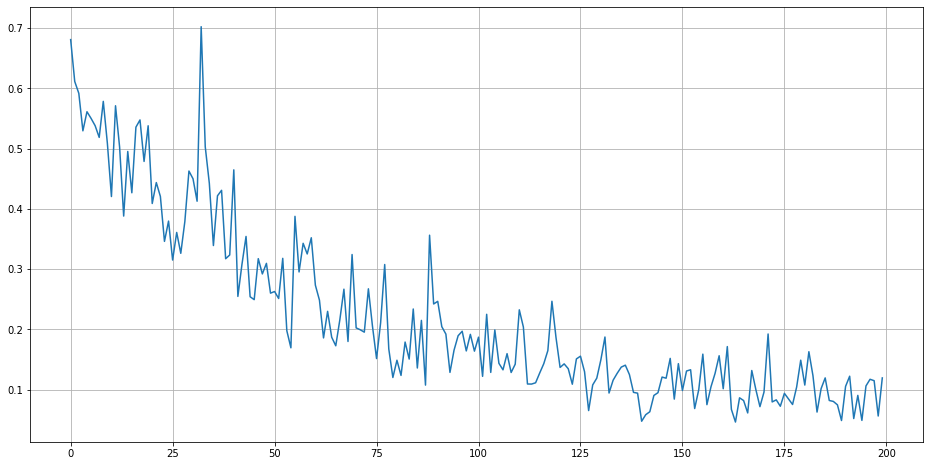

In [30]:
plt.figure(figsize=(16, 8))
epochs = list(range(len(model.history.history['loss'])))
loss = model.history.history['loss']
plt.plot(epochs, loss)
plt.grid()

[[0.9997229]]


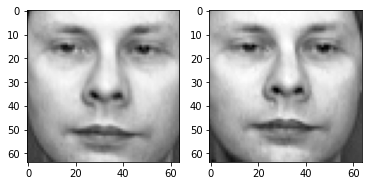

In [31]:
a = generate_data(10)
temp, y = next(a)
predict_num = 6
fig, ax = plt.subplots(1, 2)
ax[0].imshow(temp[0][predict_num].reshape(64, 64), cmap='gray')
ax[1].imshow(temp[1][predict_num].reshape(64, 64), cmap='gray')
image_pred = [np.expand_dims(temp[0][predict_num], axis=0), np.expand_dims(temp[1][predict_num], axis=0)]
print(model.predict(image_pred))